<img style="float: left;;" src='Figures/alinco.png' /></a>

# <center> <font color= #000047> Módulo 2: Aplicación de Algoritmos Genéticos: El problema del Viajero

**Problema del viajero:**

Durante décadas, el problema del viajero (TSP, por sus siglas en inglés) ha sido un desafío intrigante para matemáticos, científicos informáticos e investigadores de operaciones. Implica determinar la ruta más corta que debe tomar un viajero para visitar un conjunto de ciudades y regresar al punto de partida. A medida que aumenta el número de ciudades, la complejidad del problema crece exponencialmente, lo que se conoce como explosión combinatoria. Se han intentado soluciones para el TSP mediante una variedad de algoritmos y técnicas, como programación dinámica, ramificación y acotación, algoritmos genéticos y recocido simulado.

La complejidad computacional de los algoritmos para resolver el problema del viajante (TSP, por sus siglas en inglés) puede variar significativamente según el enfoque utilizado.

El método de **fuerza bruta** explora exhaustivamente todas las posibles permutaciones de ciudades para encontrar la solución óptima.

Para un TSP con “n” ciudades, hay (n-1) opciones para la segunda ciudad, (n-2) opciones para la tercera ciudad, y así sucesivamente hasta que solo quede una opción para la última ciudad. El número total de permutaciones se calcula como el factorial de (n-1), denotado como (n-1)!. Por ejemplo, si hay 5 ciudades (n=5), el número de permutaciones es (5–1)! = 4! = 4 x 3 x 2 x 1 = 24. Dado que el vendedor debe regresar a la ciudad de inicio para completar el recorrido, después de calcular el número de permutaciones, lo multiplicamos por “n” para tener en cuenta el inicio del recorrido desde cada una de las “n” ciudades. En el ejemplo con 5 ciudades, tenemos 24 permutaciones para cada ciudad de partida, lo que da un total de 24 x 5 = 120 posibles recorridos para evaluar.

La complejidad temporal está determinada por la cantidad total de permutaciones. Como la cantidad de permutaciones es (n-1)! * n, la complejidad temporal del método de fuerza bruta para resolver el TSP es O((n-1)! * n) que se puede simplificar a O(n!).

Los **algoritmos genéticos** implican un proceso heurístico basado en el concepto de selección natural. Estos algoritmos pueden no ofrecer la mejor solución posible, pero pueden identificar rápidamente buenas aproximaciones. Es difícil estimar la cantidad de tiempo que lleva completar un algoritmo genético, ya que depende del tamaño de la población, la cantidad de generaciones y otros factores.

Es importante tener en cuenta que el problema del viajero es un problema NP-hard, lo que significa que no se ha encontrado ningún algoritmo que sea de tiempo polinomial para resolverlo. 

In [1]:
#importar librerías
import matplotlib.pyplot as plt
from random import shuffle
import random
import numpy as np
import seaborn as sns
import statistics
from itertools import permutations

En la siguiente implementación, las ciudades se toman como genes, la cadena generada con estos caracteres se denomina cromosoma, mientras que un puntaje de aptitud que es igual a la longitud de la ruta de todas las ciudades mencionadas se utiliza para determinar una población. El puntaje de aptitud se define como la longitud de la ruta descrita por el gen. Cuanto menor sea la longitud de la ruta, más apto será el gen. El más apto de todos los genes del acervo genético sobrevive y pasa a la siguiente iteración. La cantidad de iteraciones depende del valor de una variable de costo. El valor de la variable de costo sigue disminuyendo con cada iteración y alcanza un umbral después de una cierta cantidad de iteraciones.

Para encontrrar una solución a este problema se realizarán los siguientes pasos:

> 1. Se inicializa la población.

> 2. Se calcula la aptitud de los individuos.

> 3. Se aplica el método de selección de ruleta a los individuos.

> 4. Se realiza el cruce entre los individuos seleccionados.

> 5. Se realiza la mutación en la descendencia resultante.

> 6. Se reemplaza un subconjunto de la población anterior con una nueva descendencia (Reemplazo).

> 7. Se mezcla la nueva población y la devuelve.

> 8. Se repite para la cantidad de generaciones y termina.

In [2]:
#Función para inicializar la población
def poblacion_inicial(lista_ciudades, n_pob = 250):
    poblacion_perm = []
    posible_perm = list(permutations(lista_ciudades))
    random_ids = random.sample(range(0, len(posible_perm)), n_pob)
    for i in random_ids:
        poblacion_perm.append(list(posible_perm[i]))
        
    return poblacion_perm

In [3]:
#Función para calcular la distancia entre las ciudades 
def distancia_entre_ciudades(ciudad_1, ciudad_2):
    coordenada_c1 = coordenadas_ciudades[ciudad_1]
    coordenada_c2 = coordenadas_ciudades[ciudad_2]
    
    return np.sqrt(np.sum((np.array(coordenada_c1) - np.array(coordenada_c2))**2))


In [4]:
#funcion para calcular la distancia apartir de una ciudad 
def total_dist_individual(individual):
    total_dist = 0
    for i in range(0, len(individual)):
        if (i == len(individual)-1):
            total_dist = total_dist + w1*distancia_entre_ciudades(individual[i], individual[0])
        else:
            total_dist = total_dist + distancia_entre_ciudades(individual[i], individual[i+1])
    return total_dist

In [6]:
x = [0,3,6]
y = [1,2,1]
ciudades = ['A', 'B', 'C']

coordenadas_ciudades = dict(zip(ciudades, zip(x,y)))
coordenadas_ciudades

{'A': (0, 1), 'B': (3, 2), 'C': (6, 1)}

In [7]:
distancia_entre_ciudades('A', 'B')

3.1622776601683795

In [8]:
#Función para calcular el fitness (función de costo)
def fitness_prob(poblacion):
    total_dist_todos_individuals = []
    for i in range(0, len(poblacion)):
        total_dist_todos_individuals.append(total_dist_individual(poblacion[i]))
    
    max_poblacion_cost = max(total_dist_todos_individuals)
    pob_fitness = max_poblacion_cost - total_dist_todos_individuals
    pob_fitness_sum = sum(pob_fitness)
    pob_fitness_probs = pob_fitness/pob_fitness_sum
    
    return pob_fitness_probs

In [9]:
#Función para calcular la rueda de ruleta
def roulette_wheel(poblacion, fitness_probs):
    
    poblacion_fitnes_probs_cumsum = fitness_probs.cumsum()
    bool_prob_array = poblacion_fitnes_probs_cumsum < np.random.uniform(0,1,1)
    selec_individual_index = len(bool_prob_array[bool_prob_array==True]) - 1
    
    return poblacion[selec_individual_index]

In [32]:
#Función para calcular el crossover
def crossover(padre_1, padre_2):
    n_ciudades_cut = len(nombres_ciudades) - 1 
    cut = round(random.uniform(1,n_ciudades_cut))
    
    descendiente_1 =[]
    descendiente_2 =[]
    
    descendiente_1 = padre_1[0:cut]
    descendiente_1 += [ciudad for ciudad in padre_2 if ciudad not in descendiente_1]
    
    descendiente_2 = padre_2[0:cut]
    descendiente_2 += [ciudad for ciudad in padre_1 if ciudad not in descendiente_2]
    
    return descendiente_1, descendiente_2

In [33]:
#Función para calcular la mutación 
def mutacion(descendiente):
    n_ciudades_cut = len(nombres_ciudades) - 1 
    index_1 = round(random.uniform(0,n_ciudades_cut))
    index_2 = round(random.uniform(0,n_ciudades_cut))
    
    temp = descendiente[index_1]
    descendiente[index_1] = descendiente[index_2]
    descendiente[index_2] = temp
    
    return(descendiente)

In [46]:
#Función principal para correr la optimización
def run_ga(nombre_ciudades, n_poblacion, n_generaciones, crossover_per, mutacion_per):
    
    #1.- poblacion inicial
    poblacion = poblacion_inicial(nombre_ciudades, n_pob = n_poblacion)
    fitness_probs = fitness_prob(poblacion)
    
    padres_list = []
    for i in range(0, int(crossover_per*n_poblacion)):
        padres_list.append(roulette_wheel(poblacion, fitness_probs))
    
    lista_descendientes = []
    
    for i in range(0, len(padres_list), 2):
        descendientes_1, descendientes_2 = crossover(padres_list[i], padres_list[i+1])
        
        print(f'descendiente_1: {descendientes_1}')
        print(f'descendiente_2: {descendientes_2}')
        
        mutacion_limite = random.random()
        if(mutacion_limite > (1-mutacion_per)):
            descendientes_1 = mutacion(descendientes_1)
            print(f'Mutación descendiente_1: {descendientes_1}')
        
        mutacion_limite = random.random()
        if(mutacion_limite > (1-mutacion_per)):
            descendientes_2 = mutacion(descendientes_2)
            print(f'Mutación descendiente_2: {descendientes_2}')
            
        lista_descendientes.append(descendientes_1)
        lista_descendientes.append(descendientes_2)
        
    mezcla_descendientes = padres_list + lista_descendientes
    
    fitness_probs = fitness_prob(mezcla_descendientes)
    sorted_fitness_ind = np.argsort(fitness_probs)[::-1]
    
    best_fitness_ind = sorted_fitness_ind[0:n_poblacion]
    
    best_mezcla_descendientes = []
    for i in best_fitness_ind:
        best_mezcla_descendientes.append(mezcla_descendientes[i])
        
    for i in range(0, n_generaciones):
        print(f'Generación {i}\n'  )
        fitness_probs = fitness_prob(best_mezcla_descendientes)
        
        padres_list = []
        for i in range(0, int(crossover_per*n_poblacion)):
            padres_list.append(roulette_wheel(best_mezcla_descendientes, fitness_probs))
    
        lista_descendientes = []
        
        for i in range(0, len(padres_list), 2):
            descendientes_1, descendientes_2 = crossover(padres_list[i], padres_list[i+1])

            mutacion_limite = random.random()
            if(mutacion_limite > (1-mutacion_per)):
                descendientes_1 = mutacion(descendientes_1)

            mutacion_limite = random.random()
            if(mutacion_limite > (1-mutacion_per)):
                descendientes_2 = mutacion(descendientes_2)

            lista_descendientes.append(descendientes_1)
            lista_descendientes.append(descendientes_2)

        mezcla_descendientes = padres_list + lista_descendientes

        fitness_probs = fitness_prob(mezcla_descendientes)
        sorted_fitness_ind = np.argsort(fitness_probs)[::-1]

        best_fitness_ind = sorted_fitness_ind[0:n_poblacion]

        best_mezcla_descendientes = []
        for i in best_fitness_ind:
            best_mezcla_descendientes.append(mezcla_descendientes[i])

        old_poblacion_indices = [random.randint(0, (n_poblacion -1)) for j in range(int(0.2*n_poblacion))]
        
        for i in old_poblacion_indices:
            best_mezcla_descendientes.append(poblacion[i])
            
        print(f'Mejores descendientes: {best_mezcla_descendientes}')
        random.shuffle(best_mezcla_descendientes)
        
    return best_mezcla_descendientes
        

#### Seteando los parámetros del problema

In [47]:
n_poblacion = 250
crossover_per = 0.8
mutacion_per = 0.2
n_generaciones = 300


In [48]:
x = [0,3,6,7,15,10,16,5,8,1.5]
y = [1,2,1,4.5,-1,2.5,11,6,9,12]
nombres_ciudades = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']

coordenadas_ciudades = dict(zip(ciudades, zip(x,y)))
coordenadas_ciudades

{'A': (0, 1),
 'B': (3, 2),
 'C': (6, 1),
 'D': (7, 4.5),
 'E': (15, -1),
 'F': (10, 2.5),
 'G': (16, 11),
 'H': (5, 6),
 'I': (8, 9),
 'J': (1.5, 12)}

In [49]:
#Encontrar la mejor ruta
mejores_descendientes = run_ga(nombres_ciudades, n_poblacion, n_generaciones, crossover_per, mutacion_per)

descendiente_1: ['I', 'F', 'A', 'G', 'D', 'H', 'J', 'B', 'E', 'C']
descendiente_2: ['H', 'G', 'A', 'J', 'I', 'F', 'D', 'C', 'B', 'E']
descendiente_1: ['H', 'J', 'G', 'E', 'B', 'A', 'I', 'F', 'D', 'C']
descendiente_2: ['B', 'A', 'E', 'G', 'H', 'J', 'C', 'F', 'D', 'I']
descendiente_1: ['B', 'E', 'H', 'F', 'D', 'A', 'C', 'J', 'I', 'G']
descendiente_2: ['I', 'F', 'A', 'G', 'D', 'C', 'B', 'H', 'E', 'J']
descendiente_1: ['A', 'B', 'G', 'F', 'D', 'E', 'I', 'H', 'C', 'J']
descendiente_2: ['G', 'B', 'A', 'I', 'E', 'J', 'H', 'F', 'C', 'D']
descendiente_1: ['F', 'B', 'H', 'E', 'G', 'A', 'I', 'J', 'D', 'C']
descendiente_2: ['F', 'A', 'I', 'J', 'D', 'B', 'H', 'E', 'G', 'C']
descendiente_1: ['I', 'D', 'C', 'J', 'H', 'G', 'A', 'E', 'B', 'F']
descendiente_2: ['D', 'C', 'I', 'A', 'E', 'B', 'J', 'H', 'F', 'G']
Mutación descendiente_1: ['E', 'D', 'C', 'J', 'H', 'G', 'A', 'I', 'B', 'F']
descendiente_1: ['E', 'A', 'J', 'I', 'G', 'H', 'D', 'B', 'C', 'F']
descendiente_2: ['E', 'B', 'I', 'G', 'D', 'C', 'H', '

Mejores descendientes: [['E', 'F', 'C', 'A', 'J', 'B', 'D', 'H', 'I', 'G'], ['E', 'F', 'C', 'A', 'J', 'B', 'D', 'H', 'I', 'G'], ['E', 'F', 'C', 'A', 'J', 'B', 'D', 'H', 'I', 'G'], ['E', 'F', 'C', 'A', 'J', 'B', 'D', 'H', 'I', 'G'], ['E', 'F', 'C', 'A', 'J', 'B', 'D', 'H', 'I', 'G'], ['E', 'F', 'C', 'A', 'J', 'B', 'D', 'H', 'I', 'G'], ['B', 'C', 'D', 'F', 'G', 'E', 'I', 'J', 'H', 'A'], ['B', 'C', 'D', 'F', 'G', 'E', 'I', 'J', 'H', 'A'], ['G', 'D', 'C', 'A', 'B', 'J', 'H', 'I', 'F', 'E'], ['A', 'E', 'F', 'G', 'I', 'H', 'J', 'D', 'C', 'B'], ['D', 'B', 'C', 'F', 'E', 'G', 'I', 'A', 'J', 'H'], ['A', 'E', 'F', 'G', 'I', 'D', 'J', 'H', 'C', 'B'], ['J', 'H', 'B', 'A', 'F', 'E', 'G', 'I', 'C', 'D'], ['J', 'H', 'B', 'A', 'F', 'E', 'G', 'I', 'C', 'D'], ['J', 'H', 'B', 'A', 'F', 'E', 'G', 'I', 'C', 'D'], ['B', 'A', 'C', 'D', 'F', 'G', 'E', 'H', 'I', 'J'], ['B', 'A', 'C', 'D', 'F', 'G', 'E', 'H', 'I', 'J'], ['J', 'B', 'C', 'A', 'H', 'D', 'I', 'F', 'E', 'G'], ['J', 'B', 'C', 'A', 'H', 'D', 'I', 'F',

Mejores descendientes: [['J', 'B', 'C', 'A', 'H', 'D', 'F', 'E', 'G', 'I'], ['E', 'F', 'C', 'A', 'J', 'B', 'D', 'H', 'I', 'G'], ['E', 'F', 'C', 'A', 'J', 'B', 'D', 'H', 'I', 'G'], ['I', 'A', 'B', 'C', 'E', 'G', 'F', 'D', 'H', 'J'], ['G', 'D', 'C', 'A', 'B', 'J', 'H', 'I', 'F', 'E'], ['E', 'F', 'I', 'A', 'B', 'C', 'D', 'H', 'J', 'G'], ['A', 'E', 'F', 'G', 'I', 'J', 'D', 'H', 'C', 'B'], ['A', 'E', 'F', 'G', 'I', 'J', 'D', 'H', 'C', 'B'], ['A', 'E', 'F', 'G', 'I', 'J', 'H', 'D', 'B', 'C'], ['H', 'D', 'I', 'G', 'J', 'F', 'E', 'C', 'B', 'A'], ['A', 'B', 'J', 'H', 'E', 'F', 'G', 'I', 'D', 'C'], ['H', 'E', 'F', 'G', 'J', 'I', 'D', 'C', 'B', 'A'], ['F', 'E', 'C', 'B', 'H', 'A', 'J', 'G', 'I', 'D'], ['A', 'E', 'F', 'G', 'I', 'D', 'J', 'H', 'C', 'B'], ['B', 'A', 'E', 'F', 'G', 'I', 'D', 'J', 'H', 'C'], ['A', 'E', 'F', 'G', 'I', 'D', 'J', 'H', 'C', 'B'], ['J', 'H', 'B', 'A', 'F', 'E', 'G', 'I', 'C', 'D'], ['J', 'H', 'B', 'A', 'F', 'E', 'G', 'I', 'C', 'D'], ['J', 'H', 'B', 'A', 'F', 'E', 'G', 'I',

Mejores descendientes: [['E', 'F', 'I', 'A', 'B', 'C', 'D', 'H', 'J', 'G'], ['E', 'F', 'I', 'A', 'B', 'C', 'D', 'H', 'J', 'G'], ['E', 'F', 'I', 'A', 'B', 'C', 'D', 'H', 'J', 'G'], ['E', 'F', 'I', 'A', 'B', 'C', 'D', 'H', 'J', 'G'], ['E', 'F', 'I', 'A', 'B', 'C', 'D', 'H', 'J', 'G'], ['E', 'F', 'I', 'A', 'B', 'C', 'D', 'H', 'J', 'G'], ['E', 'F', 'I', 'A', 'B', 'C', 'D', 'H', 'J', 'G'], ['E', 'F', 'I', 'A', 'B', 'C', 'D', 'H', 'J', 'G'], ['F', 'E', 'C', 'B', 'A', 'D', 'I', 'H', 'J', 'G'], ['B', 'A', 'D', 'I', 'H', 'J', 'G', 'F', 'E', 'C'], ['A', 'E', 'F', 'G', 'I', 'J', 'D', 'H', 'C', 'B'], ['A', 'E', 'F', 'G', 'I', 'J', 'D', 'H', 'C', 'B'], ['A', 'E', 'F', 'G', 'I', 'H', 'J', 'D', 'C', 'B'], ['F', 'C', 'H', 'J', 'I', 'G', 'E', 'A', 'B', 'D'], ['E', 'C', 'A', 'B', 'H', 'I', 'J', 'D', 'G', 'F'], ['H', 'D', 'I', 'G', 'J', 'F', 'E', 'C', 'B', 'A'], ['H', 'D', 'I', 'G', 'J', 'F', 'E', 'C', 'B', 'A'], ['A', 'B', 'J', 'H', 'E', 'F', 'G', 'I', 'D', 'C'], ['F', 'E', 'C', 'H', 'A', 'B', 'D', 'I',

Mejores descendientes: [['F', 'E', 'C', 'B', 'A', 'J', 'G', 'I', 'H', 'D'], ['F', 'E', 'C', 'B', 'A', 'J', 'G', 'I', 'H', 'D'], ['H', 'D', 'F', 'E', 'G', 'I', 'J', 'B', 'C', 'A'], ['E', 'F', 'C', 'B', 'A', 'J', 'G', 'I', 'H', 'D'], ['F', 'E', 'C', 'B', 'A', 'J', 'G', 'I', 'D', 'H'], ['E', 'F', 'C', 'A', 'B', 'J', 'G', 'I', 'H', 'D'], ['A', 'B', 'I', 'G', 'J', 'H', 'D', 'F', 'E', 'C'], ['D', 'F', 'B', 'A', 'C', 'H', 'J', 'I', 'G', 'E'], ['E', 'F', 'C', 'A', 'J', 'B', 'D', 'H', 'I', 'G'], ['E', 'F', 'C', 'A', 'J', 'B', 'D', 'H', 'I', 'G'], ['I', 'D', 'F', 'E', 'G', 'J', 'B', 'A', 'C', 'H'], ['I', 'G', 'F', 'E', 'D', 'B', 'C', 'A', 'H', 'J'], ['E', 'F', 'I', 'A', 'B', 'C', 'D', 'H', 'J', 'G'], ['A', 'E', 'F', 'G', 'I', 'J', 'D', 'H', 'C', 'B'], ['B', 'A', 'J', 'E', 'F', 'G', 'I', 'H', 'D', 'C'], ['B', 'A', 'J', 'E', 'F', 'G', 'I', 'H', 'D', 'C'], ['B', 'A', 'J', 'E', 'F', 'G', 'I', 'H', 'D', 'C'], ['H', 'D', 'I', 'G', 'J', 'F', 'E', 'C', 'B', 'A'], ['H', 'D', 'I', 'G', 'J', 'F', 'E', 'C',

Mejores descendientes: [['B', 'C', 'D', 'H', 'F', 'E', 'G', 'I', 'J', 'A'], ['F', 'E', 'C', 'B', 'A', 'J', 'G', 'I', 'H', 'D'], ['H', 'C', 'F', 'E', 'G', 'I', 'J', 'B', 'A', 'D'], ['H', 'C', 'F', 'E', 'G', 'I', 'J', 'B', 'A', 'D'], ['H', 'C', 'F', 'E', 'G', 'I', 'J', 'B', 'A', 'D'], ['H', 'C', 'F', 'E', 'G', 'I', 'J', 'B', 'A', 'D'], ['H', 'C', 'F', 'E', 'G', 'I', 'J', 'B', 'A', 'D'], ['H', 'C', 'F', 'E', 'G', 'I', 'J', 'B', 'A', 'D'], ['H', 'C', 'F', 'E', 'G', 'I', 'J', 'D', 'B', 'A'], ['B', 'A', 'D', 'E', 'F', 'G', 'I', 'J', 'H', 'C'], ['D', 'E', 'F', 'G', 'I', 'J', 'B', 'A', 'C', 'H'], ['F', 'E', 'C', 'B', 'A', 'J', 'G', 'I', 'D', 'H'], ['F', 'E', 'C', 'B', 'A', 'J', 'G', 'I', 'D', 'H'], ['F', 'E', 'C', 'B', 'A', 'I', 'G', 'J', 'H', 'D'], ['E', 'F', 'C', 'A', 'B', 'J', 'G', 'I', 'H', 'D'], ['H', 'D', 'F', 'E', 'C', 'B', 'A', 'G', 'I', 'J'], ['D', 'F', 'B', 'A', 'C', 'H', 'J', 'I', 'G', 'E'], ['F', 'E', 'C', 'B', 'A', 'D', 'G', 'I', 'J', 'H'], ['J', 'B', 'C', 'A', 'D', 'H', 'F', 'E',

Mejores descendientes: [['B', 'C', 'D', 'F', 'E', 'G', 'I', 'H', 'J', 'A'], ['B', 'A', 'D', 'F', 'E', 'G', 'I', 'J', 'H', 'C'], ['F', 'E', 'C', 'B', 'A', 'J', 'G', 'I', 'H', 'D'], ['I', 'J', 'B', 'C', 'A', 'H', 'D', 'F', 'E', 'G'], ['I', 'G', 'F', 'E', 'A', 'B', 'C', 'D', 'H', 'J'], ['H', 'C', 'F', 'E', 'G', 'I', 'J', 'B', 'A', 'D'], ['H', 'C', 'F', 'E', 'G', 'I', 'J', 'B', 'A', 'D'], ['H', 'C', 'F', 'E', 'G', 'I', 'J', 'B', 'A', 'D'], ['H', 'C', 'F', 'E', 'G', 'I', 'J', 'B', 'A', 'D'], ['H', 'C', 'F', 'E', 'G', 'I', 'J', 'B', 'A', 'D'], ['H', 'C', 'F', 'E', 'G', 'I', 'J', 'B', 'A', 'D'], ['H', 'C', 'F', 'E', 'G', 'I', 'J', 'B', 'A', 'D'], ['E', 'F', 'C', 'H', 'D', 'A', 'B', 'J', 'I', 'G'], ['I', 'G', 'F', 'E', 'D', 'C', 'B', 'A', 'J', 'H'], ['H', 'C', 'F', 'E', 'G', 'I', 'J', 'D', 'B', 'A'], ['B', 'A', 'D', 'E', 'F', 'G', 'I', 'J', 'H', 'C'], ['B', 'A', 'D', 'E', 'F', 'G', 'I', 'J', 'H', 'C'], ['F', 'E', 'C', 'B', 'A', 'J', 'G', 'I', 'D', 'H'], ['F', 'E', 'C', 'B', 'A', 'I', 'G', 'J',

Mejores descendientes: [['A', 'B', 'C', 'D', 'F', 'E', 'G', 'I', 'H', 'J'], ['E', 'F', 'C', 'B', 'A', 'J', 'D', 'H', 'I', 'G'], ['E', 'F', 'C', 'B', 'A', 'J', 'D', 'H', 'I', 'G'], ['D', 'F', 'B', 'A', 'C', 'E', 'G', 'I', 'J', 'H'], ['E', 'F', 'C', 'A', 'B', 'J', 'D', 'H', 'I', 'G'], ['E', 'F', 'C', 'A', 'B', 'J', 'D', 'H', 'I', 'G'], ['B', 'A', 'D', 'F', 'C', 'E', 'G', 'I', 'J', 'H'], ['B', 'A', 'D', 'E', 'F', 'G', 'I', 'J', 'H', 'C'], ['E', 'F', 'C', 'A', 'H', 'D', 'B', 'J', 'I', 'G'], ['F', 'E', 'C', 'B', 'A', 'J', 'H', 'G', 'I', 'D'], ['F', 'E', 'C', 'B', 'A', 'J', 'H', 'G', 'I', 'D'], ['F', 'E', 'C', 'B', 'A', 'J', 'H', 'G', 'I', 'D'], ['F', 'E', 'C', 'B', 'A', 'J', 'H', 'G', 'I', 'D'], ['E', 'F', 'C', 'A', 'B', 'J', 'G', 'I', 'H', 'D'], ['E', 'F', 'C', 'A', 'B', 'J', 'G', 'I', 'H', 'D'], ['E', 'F', 'C', 'A', 'B', 'J', 'G', 'I', 'H', 'D'], ['I', 'H', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'J'], ['H', 'A', 'J', 'B', 'C', 'D', 'F', 'E', 'G', 'I'], ['H', 'A', 'J', 'B', 'C', 'D', 'F', 'E',

Mejores descendientes: [['I', 'G', 'E', 'F', 'C', 'B', 'A', 'D', 'H', 'J'], ['I', 'G', 'E', 'F', 'D', 'C', 'B', 'A', 'J', 'H'], ['B', 'C', 'D', 'H', 'F', 'E', 'G', 'I', 'J', 'A'], ['B', 'C', 'D', 'H', 'F', 'E', 'G', 'I', 'J', 'A'], ['B', 'C', 'D', 'H', 'F', 'E', 'G', 'I', 'J', 'A'], ['B', 'C', 'D', 'H', 'F', 'E', 'G', 'I', 'J', 'A'], ['E', 'F', 'C', 'B', 'A', 'J', 'D', 'H', 'I', 'G'], ['E', 'F', 'C', 'B', 'A', 'J', 'D', 'H', 'I', 'G'], ['E', 'F', 'C', 'B', 'A', 'J', 'D', 'H', 'I', 'G'], ['E', 'F', 'C', 'B', 'A', 'J', 'D', 'H', 'I', 'G'], ['I', 'G', 'E', 'F', 'C', 'B', 'A', 'J', 'D', 'H'], ['I', 'G', 'F', 'E', 'C', 'B', 'A', 'D', 'H', 'J'], ['E', 'F', 'H', 'D', 'C', 'A', 'B', 'J', 'I', 'G'], ['I', 'G', 'F', 'E', 'C', 'B', 'A', 'J', 'H', 'D'], ['B', 'A', 'C', 'D', 'E', 'F', 'G', 'I', 'J', 'H'], ['B', 'A', 'C', 'D', 'E', 'F', 'G', 'I', 'J', 'H'], ['B', 'A', 'C', 'D', 'E', 'F', 'G', 'I', 'J', 'H'], ['I', 'G', 'E', 'F', 'C', 'A', 'B', 'J', 'D', 'H'], ['I', 'G', 'E', 'F', 'C', 'A', 'B', 'J',

Mejores descendientes: [['B', 'C', 'D', 'H', 'F', 'E', 'G', 'I', 'J', 'A'], ['E', 'F', 'C', 'B', 'A', 'J', 'D', 'H', 'I', 'G'], ['E', 'F', 'C', 'B', 'A', 'J', 'D', 'H', 'I', 'G'], ['E', 'F', 'C', 'B', 'A', 'J', 'D', 'H', 'I', 'G'], ['E', 'F', 'C', 'B', 'A', 'J', 'D', 'H', 'I', 'G'], ['I', 'G', 'F', 'E', 'C', 'B', 'A', 'D', 'H', 'J'], ['E', 'F', 'H', 'D', 'C', 'A', 'B', 'J', 'I', 'G'], ['E', 'F', 'H', 'D', 'C', 'A', 'B', 'J', 'I', 'G'], ['F', 'H', 'J', 'A', 'B', 'C', 'D', 'I', 'G', 'E'], ['E', 'F', 'H', 'J', 'A', 'B', 'C', 'D', 'I', 'G'], ['I', 'G', 'F', 'E', 'C', 'B', 'A', 'J', 'H', 'D'], ['I', 'G', 'F', 'E', 'C', 'B', 'A', 'J', 'H', 'D'], ['I', 'G', 'F', 'E', 'C', 'B', 'A', 'J', 'H', 'D'], ['B', 'C', 'D', 'E', 'F', 'G', 'I', 'J', 'H', 'A'], ['B', 'C', 'D', 'E', 'F', 'G', 'I', 'J', 'H', 'A'], ['B', 'C', 'D', 'E', 'F', 'G', 'I', 'J', 'H', 'A'], ['B', 'C', 'D', 'E', 'F', 'G', 'I', 'J', 'H', 'A'], ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'I', 'J', 'H'], ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'I',

Mejores descendientes: [['E', 'F', 'C', 'B', 'A', 'J', 'H', 'D', 'I', 'G'], ['D', 'H', 'B', 'A', 'C', 'F', 'E', 'G', 'I', 'J'], ['D', 'H', 'B', 'A', 'C', 'F', 'E', 'G', 'I', 'J'], ['D', 'H', 'B', 'A', 'C', 'F', 'E', 'G', 'I', 'J'], ['E', 'F', 'C', 'B', 'A', 'J', 'D', 'H', 'I', 'G'], ['I', 'G', 'F', 'E', 'C', 'B', 'A', 'D', 'H', 'J'], ['I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'J', 'H'], ['E', 'F', 'H', 'D', 'C', 'A', 'B', 'J', 'I', 'G'], ['E', 'F', 'H', 'J', 'A', 'B', 'C', 'D', 'I', 'G'], ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'I', 'J', 'H'], ['B', 'C', 'D', 'E', 'F', 'G', 'I', 'J', 'H', 'A'], ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'I', 'J', 'H'], ['B', 'A', 'C', 'D', 'E', 'F', 'G', 'I', 'J', 'H'], ['B', 'A', 'C', 'D', 'E', 'F', 'G', 'I', 'J', 'H'], ['B', 'A', 'C', 'D', 'E', 'F', 'G', 'I', 'J', 'H'], ['B', 'A', 'C', 'D', 'E', 'F', 'G', 'I', 'J', 'H'], ['D', 'F', 'B', 'A', 'C', 'E', 'G', 'I', 'J', 'H'], ['D', 'F', 'B', 'A', 'C', 'E', 'G', 'I', 'J', 'H'], ['I', 'G', 'E', 'F', 'C', 'A', 'B', 'J',

Mejores descendientes: [['D', 'H', 'B', 'A', 'C', 'F', 'E', 'G', 'I', 'J'], ['D', 'H', 'J', 'I', 'G', 'F', 'E', 'C', 'A', 'B'], ['E', 'F', 'C', 'B', 'A', 'H', 'D', 'I', 'J', 'G'], ['I', 'G', 'F', 'E', 'C', 'B', 'A', 'D', 'H', 'J'], ['E', 'F', 'C', 'A', 'B', 'D', 'H', 'I', 'J', 'G'], ['I', 'G', 'E', 'F', 'C', 'B', 'A', 'H', 'J', 'D'], ['E', 'F', 'C', 'B', 'A', 'H', 'J', 'D', 'I', 'G'], ['E', 'F', 'H', 'D', 'C', 'A', 'B', 'J', 'I', 'G'], ['I', 'G', 'F', 'E', 'C', 'B', 'A', 'J', 'H', 'D'], ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'I', 'J', 'H'], ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'I', 'J', 'H'], ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'I', 'J', 'H'], ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'I', 'J', 'H'], ['I', 'G', 'E', 'F', 'C', 'A', 'B', 'J', 'D', 'H'], ['I', 'G', 'E', 'F', 'C', 'A', 'B', 'J', 'D', 'H'], ['I', 'G', 'E', 'F', 'C', 'A', 'B', 'J', 'D', 'H'], ['I', 'G', 'E', 'F', 'C', 'A', 'B', 'J', 'D', 'H'], ['I', 'G', 'E', 'F', 'C', 'A', 'B', 'J', 'D', 'H'], ['F', 'E', 'C', 'B', 'A', 'J', 'I', 'G',

Mejores descendientes: [['E', 'F', 'C', 'B', 'A', 'D', 'H', 'J', 'I', 'G'], ['E', 'F', 'C', 'B', 'A', 'D', 'H', 'J', 'I', 'G'], ['D', 'H', 'J', 'A', 'B', 'C', 'F', 'E', 'G', 'I'], ['I', 'G', 'E', 'F', 'C', 'B', 'A', 'H', 'D', 'J'], ['I', 'G', 'E', 'F', 'C', 'A', 'B', 'H', 'D', 'J'], ['H', 'I', 'G', 'E', 'F', 'C', 'B', 'A', 'J', 'D'], ['E', 'F', 'C', 'B', 'A', 'J', 'D', 'H', 'I', 'G'], ['E', 'F', 'C', 'A', 'B', 'D', 'H', 'I', 'J', 'G'], ['E', 'F', 'C', 'A', 'B', 'D', 'H', 'I', 'J', 'G'], ['E', 'F', 'C', 'B', 'A', 'H', 'J', 'D', 'I', 'G'], ['I', 'G', 'E', 'F', 'C', 'B', 'A', 'H', 'J', 'D'], ['E', 'F', 'C', 'B', 'A', 'H', 'J', 'D', 'I', 'G'], ['E', 'F', 'C', 'B', 'A', 'H', 'J', 'D', 'I', 'G'], ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'I', 'J', 'H'], ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'I', 'J', 'H'], ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'I', 'J', 'H'], ['D', 'F', 'E', 'C', 'B', 'A', 'H', 'J', 'I', 'G'], ['B', 'A', 'C', 'D', 'E', 'F', 'G', 'I', 'J', 'H'], ['I', 'G', 'E', 'F', 'C', 'A', 'B', 'J',

Mejores descendientes: [['B', 'A', 'D', 'H', 'J', 'I', 'G', 'E', 'F', 'C'], ['E', 'F', 'C', 'B', 'A', 'J', 'D', 'H', 'I', 'G'], ['B', 'A', 'D', 'H', 'J', 'I', 'G', 'F', 'E', 'C'], ['B', 'A', 'D', 'H', 'J', 'I', 'G', 'F', 'E', 'C'], ['B', 'A', 'D', 'H', 'J', 'I', 'G', 'F', 'E', 'C'], ['B', 'A', 'D', 'H', 'J', 'I', 'G', 'F', 'E', 'C'], ['E', 'F', 'C', 'B', 'A', 'H', 'J', 'D', 'I', 'G'], ['E', 'F', 'C', 'B', 'A', 'H', 'J', 'D', 'I', 'G'], ['E', 'F', 'C', 'B', 'A', 'H', 'J', 'D', 'I', 'G'], ['I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'J', 'H'], ['I', 'G', 'E', 'F', 'C', 'A', 'B', 'H', 'J', 'D'], ['I', 'G', 'E', 'F', 'C', 'A', 'B', 'H', 'J', 'D'], ['I', 'D', 'H', 'J', 'A', 'B', 'C', 'E', 'F', 'G'], ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'I', 'J', 'H'], ['F', 'E', 'C', 'D', 'H', 'B', 'A', 'J', 'I', 'G'], ['F', 'E', 'C', 'D', 'H', 'B', 'A', 'J', 'I', 'G'], ['I', 'G', 'E', 'F', 'D', 'B', 'C', 'A', 'J', 'H'], ['D', 'H', 'B', 'A', 'C', 'E', 'F', 'G', 'I', 'J'], ['D', 'H', 'B', 'A', 'C', 'E', 'F', 'G',

Mejores descendientes: [['I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H', 'J'], ['I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H', 'J'], ['I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H', 'J'], ['B', 'A', 'D', 'H', 'J', 'I', 'G', 'E', 'F', 'C'], ['B', 'A', 'D', 'H', 'J', 'I', 'G', 'E', 'F', 'C'], ['B', 'A', 'D', 'H', 'J', 'I', 'G', 'E', 'F', 'C'], ['B', 'A', 'D', 'H', 'J', 'I', 'G', 'E', 'F', 'C'], ['B', 'A', 'D', 'H', 'J', 'I', 'G', 'E', 'F', 'C'], ['I', 'G', 'E', 'F', 'C', 'A', 'B', 'J', 'H', 'D'], ['H', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'J'], ['H', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'J'], ['H', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'J'], ['E', 'F', 'C', 'B', 'A', 'J', 'D', 'H', 'I', 'G'], ['I', 'G', 'E', 'F', 'D', 'H', 'B', 'C', 'A', 'J'], ['B', 'A', 'D', 'H', 'J', 'I', 'G', 'F', 'E', 'C'], ['E', 'F', 'C', 'B', 'A', 'H', 'J', 'D', 'I', 'G'], ['E', 'F', 'C', 'B', 'A', 'H', 'J', 'D', 'I', 'G'], ['I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'J', 'H'], ['I', 'G', 'E', 'F', 'C', 'A', 'B', 'H',

Mejores descendientes: [['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H', 'J'], ['I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H', 'J'], ['I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H', 'J'], ['I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H', 'J'], ['I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H', 'J'], ['B', 'A', 'D', 'H', 'J', 'I', 'G', 'E', 'F', 'C'], ['B', 'A', 'D', 'H', 'J', 'I', 'G', 'E', 'F', 'C'], ['J', 'I', 'G', 'E', 'F', 'C', 'B', 'A', 'H', 'D'], ['J', 'I', 'G', 'E', 'F', 'C', 'D', 'B', 'A', 'H'], ['I', 'G', 'E', 'F', 'C', 'A', 'B', 'J', 'H', 'D'], ['H', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'J'], ['H', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'J'], ['H', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'J'], ['H', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'J'], ['H', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'J'], ['H', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'J'], ['H', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'J'], ['H', 'I', 'G', 'E', 'F', 'D', 'C', 'A',

Mejores descendientes: [['I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H', 'J'], ['I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H', 'J'], ['I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H', 'J'], ['I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H', 'J'], ['I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H', 'J'], ['I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H', 'J'], ['I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H', 'J'], ['I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H', 'J'], ['I', 'G', 'E', 'F', 'H', 'D', 'C', 'B', 'A', 'J'], ['D', 'H', 'B', 'A', 'C', 'F', 'E', 'G', 'I', 'J'], ['J', 'I', 'G', 'E', 'F', 'C', 'D', 'A', 'B', 'H'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'C', 'D'], ['I', 'G', 'E', 'F', 'C', 'A', 'B', 'J', 'H', 'D'], ['I', 'G', 'E', 'F', 'C', 'A', 'B', 'J', 'H', 'D'], ['H', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'J'], ['I', 'G', 'E', 'F', 'D', 'H', 'B', 'C', 'A', 'J'], ['I', 'G', 'E', 'F', 'D', 'H', 'B', 'C', 'A', 'J'], ['J', 'I', 'G', 'F', 'E', 'C', 'B', 'A', 'D', 'H'], ['B', 'A', 'D', 'H', 'J', 'I', 'G', 'F',

Mejores descendientes: [['I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H', 'J'], ['I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H', 'J'], ['I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H', 'J'], ['I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H', 'J'], ['I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H', 'J'], ['B', 'A', 'D', 'H', 'J', 'I', 'G', 'E', 'F', 'C'], ['H', 'I', 'G', 'E', 'F', 'D', 'C', 'B', 'A', 'J'], ['J', 'I', 'G', 'E', 'F', 'C', 'D', 'H', 'B', 'A'], ['J', 'I', 'G', 'E', 'F', 'C', 'D', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'D', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'D', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'D', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'D', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'D', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'D', 'A', 'B', 'H'], ['H', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'J'], ['B', 'A', 'D', 'H', 'J', 'I', 'G', 'F', 'E', 'C'], ['B', 'A', 'D', 'H', 'J', 'I', 'G', 'F', 'E', 'C'], ['B', 'A', 'D', 'H', 'J', 'I', 'G', 'F',

Mejores descendientes: [['H', 'J', 'I', 'G', 'E', 'F', 'D', 'C', 'B', 'A'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H', 'J'], ['A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F', 'C'], ['I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H', 'J'], ['B', 'A', 'D', 'H', 'J', 'I', 'G', 'E', 'F', 'C'], ['B', 'A', 'D', 'H', 'J', 'I', 'G', 'E', 'F', 'C'], ['H', 'J', 'I', 'G', 'E', 'F', 'B', 'A', 'C', 'D'], ['I', 'G', 'E', 'F', 'C', 'B', 'A', 'H', 'D', 'J'], ['I', 'G', 'E', 'F', 'C', 'B', 'A', 'H', 'D', 'J'], ['I', 'G', 'E', 'F', 'C', 'B', 'A', 'H', 'D', 'J'], ['J', 'I', 'G', 'E', 'F', 'A', 'B', 'C', 'D', 'H'], ['I', 'G', 'E', 'F', 'C', 'A', 'B', 'H', 'D', 'J'], ['I', 'G', 'E', 'F', 'D', 'A', 'B', 'C', 'H', 'J'], ['I', 'G', 'E', 'F', 'D', 'A', 'B', 'C', 'H', 'J'], ['J', 'I', 'G', 'E', 'F', 'C', 'D', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'D', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'D', 'A',

Mejores descendientes: [['I', 'G', 'E', 'F', 'D', 'C', 'B', 'A', 'H', 'J'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H', 'J'], ['A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F', 'C'], ['I', 'G', 'E', 'F', 'C', 'B', 'A', 'H', 'D', 'J'], ['J', 'I', 'G', 'E', 'F', 'A', 'B', 'C', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'A', 'B', 'C', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'A', 'B', 'C', 'D', 'H'], ['A', 'B', 'C', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['I', 'G', 'E', 'F', 'C', 'A', 'B', 'H', 'D', 'J'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'H', 'D'], ['I', 'G', 'E', 'F', 'C', 'A', 'B', 'H', 'D', 'J'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'H', 'D'], ['J', 'I', 'G', 'E', 'F', 'C', 'D', 'A', 'B', 'H'], ['A', 'B', 'J', 'I', 'G', 'E', 'F', 'D', 'H', 'C'], ['A', 'B', 'J', 'I', 'G', 'E', 'F', 'D', 'H', 'C'], ['A', 'B', 'J', 'I', 'G', 'E', 'F', 'D', 'H', 'C'], ['A', 'B', 'J', 'I', 'G', 'E', 'F', 'D',

Mejores descendientes: [['A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F', 'C'], ['A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F', 'C'], ['I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H', 'J'], ['I', 'G', 'E', 'F', 'C', 'B', 'A', 'H', 'D', 'J'], ['I', 'G', 'E', 'F', 'C', 'B', 'A', 'H', 'D', 'J'], ['I', 'G', 'E', 'F', 'C', 'B', 'A', 'H', 'D', 'J'], ['I', 'G', 'E', 'F', 'C', 'B', 'A', 'H', 'D', 'J'], ['A', 'B', 'C', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['J', 'I', 'G', 'E', 'F', 'A', 'B', 'C', 'D', 'H'], ['A', 'B', 'C', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['A', 'B', 'C', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['A', 'B', 'C', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['A', 'B', 'C', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'H', 'D'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'H', 'D'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'H', 'D'], ['D', 'J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'D', 'B', 'A', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'D', 'A',

Mejores descendientes: [['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H', 'J'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H', 'J'], ['I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H', 'J'], ['I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H', 'J'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F', 'C'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['I', 'G', 'E', 'F', 'C', 'B', 'A', 'H', 'D', 'J'], ['I', 'G', 'E', 'F', 'C', 'B', 'A', 'H', 'D', 'J'], ['I', 'G', 'E', 'F', 'C', 'B', 'A', 'H', 'D', 'J'], ['I', 'G', 'E', 'F', 'C', 'B', 'A', 'H', 'D', 'J'], ['I', 'G', 'E', 'F', 'C', 'B', 'A', 'H', 'D', 'J'], ['I', 'G', 'E', 'F', 'C', 'B', 'A', 'H', 'D', 'J'], ['I', 'G', 'E', 'F', 'C', 'B', 'A', 'H',

Mejores descendientes: [['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['D', 'H', 'J', 'I', 'G', 'E', 'F', 'C', 'A', 'B'], ['I', 'G', 'E', 'F', 'C', 'B', 'A', 'D', 'H', 'J'], ['J', 'I', 'G', 'E', 'F', 'C', 'B', 'A',

Mejores descendientes: [['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['I', 'G', 'E', 'F', 'C', 'B', 'A', 'H', 'D', 'J'], ['A', 'B', 'C', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['J', 'I', 'G', 'E', 'F', 'D', 'C', 'B', 'A', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'B', 'A', 'C', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'B', 'A', 'C', 'D', 'H'], ['I', 'G', 'E', 'F', 'C', 'B', 'A', 'H', 'D', 'J'], ['I', 'G', 'E', 'F', 'C', 'B', 'A', 'H', 'D', 'J'], ['A', 'B', 'C', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['A', 'B', 'C', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['A', 'B', 'C', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['J', 'I', 'G', 'E', 'F', 'A', 'B', 'C', 'D', 'H'], ['A', 'B', 'C', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['J', 'I', 'G', 'E', 'F', 'A', 'B', 'C', 'D', 'H'], ['A', 'B', 'C', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['J', 'I', 'G', 'E', 'F', 'D', 'C', 'B', 'A', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['D', 'H', 'J', 'I', 'G', 'E', 'F', 'C', 'A', 'B'], ['B', 'A', 'J', 'I', 'G', 'E', 'F', 'C', 'D', 'H'], ['B', 'A', 'J', 'I', 'G', 'E', 'F', 'C', 'D', 'H'], ['A', 'B', 'C', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['A', 'B', 'C', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['A', 'B', 'C', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['A', 'B', 'C', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['A', 'B', 'C', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['J', 'I', 'G', 'E', 'F', 'A', 'B', 'C', 'D', 'H'], ['A', 'B', 'C', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['J', 'I', 'G', 'E', 'F', 'A', 'B', 'C', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'A', 'B', 'C',

Mejores descendientes: [['J', 'I', 'G', 'E', 'F', 'D', 'C', 'B', 'A', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['H', 'J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['H', 'J', 'I', 'G', 'E', 'F', 'C', 'B', 'A', 'D'], ['B', 'A', 'J', 'I', 'G', 'E', 'F', 'C', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'D', 'H', 'B', 'A'], ['B', 'A', 'J', 'I', 'G', 'E', 'F', 'C', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'B', 'A', 'C', 'D', 'H'], ['A', 'B', 'C', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['J', 'I', 'G', 'E', 'F', 'A', 'B', 'C', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'A', 'B', 'C', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'A', 'B', 'C', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'A', 'B', 'C', 'D', 'H'], ['A', 'B', 'C', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['J', 'I', 'G', 'E', 'F', 'D', 'C', 'B', 'A', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'B', 'A', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'B', 'A', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['H', 'J', 'I', 'G', 'E', 'F', 'C', 'B', 'A', 'D'], ['B', 'A', 'J', 'H', 'I', 'G', 'E', 'F', 'D', 'C'], ['J', 'I', 'G', 'E', 'F', 'C', 'D', 'H', 'B', 'A'], ['J', 'I', 'G', 'E', 'F', 'C', 'D', 'H', 'B', 'A'], ['J', 'I', 'G', 'E', 'F', 'C', 'D', 'H', 'B', 'A'], ['J', 'I', 'G', 'E', 'F', 'B', 'A', 'C', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'B', 'A', 'C', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'A', 'B', 'C', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'A', 'B', 'C', 'D', 'H'], ['A', 'B', 'C', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['A', 'B', 'C', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['J', 'I', 'G', 'E', 'F', 'D', 'C', 'B', 'A', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'B', 'A', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'B', 'A', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['H', 'J', 'I', 'G', 'E', 'F', 'C', 'B', 'A', 'D'], ['H', 'J', 'I', 'G', 'E', 'F', 'C', 'B', 'A', 'D'], ['B', 'A', 'J', 'H', 'I', 'G', 'E', 'F', 'D', 'C'], ['J', 'I', 'G', 'E', 'F', 'C', 'D', 'H', 'B', 'A'], ['J', 'I', 'G', 'E', 'F', 'C', 'D', 'H', 'B', 'A'], ['J', 'I', 'G', 'E', 'F', 'C', 'D', 'H', 'B', 'A'], ['J', 'I', 'G', 'E', 'F', 'B', 'A', 'C', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'B', 'A', 'C', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'B', 'A', 'C', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'B', 'A', 'C', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'B', 'A', 'C', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'B', 'A', 'C', 'D', 'H'], ['A', 'B', 'C', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['B', 'A', 'J', 'H', 'D', 'I', 'G', 'E', 'F', 'C'], ['B', 'A', 'J', 'H', 'I', 'G', 'E', 'F', 'D', 'C'], ['B', 'A', 'J', 'H', 'I', 'G', 'E', 'F', 'D', 'C'], ['J', 'I', 'G', 'E', 'F', 'C', 'D', 'H', 'B', 'A'], ['J', 'I', 'G', 'E', 'F', 'C', 'D', 'H', 'B', 'A'], ['B', 'A', 'J', 'I', 'G', 'E', 'F', 'C', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'B', 'A', 'C', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'A', 'B', 'C', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'A', 'B', 'C', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'A', 'B', 'C', 'D', 'H'], ['A', 'B', 'C', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['J', 'I', 'G', 'E', 'F', 'A', 'B', 'C', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'A', 'B', 'C', 'D', 'H'], ['A', 'B', 'C', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['A', 'B', 'C', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['J', 'I', 'G', 'E', 'F', 'A', 'B', 'C', 'D', 'H'], ['A', 'B', 'C', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['J', 'I', 'G', 'E', 'F', 'A', 'B', 'C', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'A', 'B', 'C',

Mejores descendientes: [['J', 'I', 'G', 'E', 'F', 'D', 'C', 'B', 'A', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['D', 'H', 'J', 'I', 'G', 'E', 'F', 'C', 'A', 'B'], ['J', 'I', 'G', 'E', 'F', 'C', 'D', 'H', 'B', 'A'], ['J', 'I', 'G', 'E', 'F', 'B', 'A', 'C', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'B', 'A', 'C', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'B', 'A', 'C', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'B', 'A', 'C', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'B', 'A', 'C', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'B', 'A', 'C', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'B', 'A', 'C', 'D', 'H'], ['A', 'B', 'C', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['J', 'I', 'G', 'E', 'F', 'A', 'B', 'C', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'A', 'B', 'C', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'A', 'B', 'C', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'A', 'B', 'C', 'D', 'H'], ['A', 'B', 'C', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['J', 'I', 'G', 'E', 'F', 'A', 'B', 'C', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'A', 'B', 'C',

Mejores descendientes: [['J', 'I', 'G', 'E', 'F', 'D', 'C', 'B', 'A', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'B', 'A', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'B', 'A', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'H', 'C', 'B', 'A'], ['J', 'I', 'G', 'E', 'F', 'C', 'D', 'H', 'B', 'A'], ['J', 'I', 'G', 'E', 'F', 'C', 'D', 'H', 'B', 'A'], ['B', 'A', 'J', 'I', 'G', 'E', 'F', 'C', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'D', 'H', 'B', 'A'], ['B', 'A', 'J', 'I', 'G', 'E', 'F', 'C', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'B', 'A', 'C', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'B', 'A', 'C', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'B', 'A', 'C', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'A', 'B', 'C', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'A', 'B', 'C', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'A', 'B', 'C', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'A', 'B', 'C', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'A', 'B', 'C', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'A', 'B', 'C',

Mejores descendientes: [['J', 'I', 'G', 'E', 'F', 'D', 'C', 'B', 'A', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'B', 'A', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'B', 'A', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['D', 'H', 'B', 'A', 'J', 'I', 'G', 'E', 'F', 'C'], ['J', 'I', 'G', 'E', 'F', 'A', 'B', 'C', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'A', 'B', 'C', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'A', 'B', 'C', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'A', 'B', 'C', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'A', 'B', 'C', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'A', 'B', 'C', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'A', 'B', 'C', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'A', 'B', 'C', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'A', 'B', 'C',

Mejores descendientes: [['A', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C', 'B'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'H', 'C', 'B', 'A'], ['A', 'J', 'I', 'G', 'E', 'F', 'D', 'H', 'C', 'B'], ['B', 'A', 'J', 'H', 'I', 'G', 'E', 'F', 'D', 'C'], ['B', 'A', 'J', 'H', 'I', 'G', 'E', 'F', 'D', 'C'], ['D', 'J', 'I', 'G', 'E', 'F', 'C', 'B', 'A', 'H'], ['J', 'I', 'G', 'E', 'F', 'A', 'B', 'C', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'A', 'B', 'C', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'A', 'B', 'C', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'A', 'B', 'C', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'A', 'B', 'C', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'A', 'B', 'C', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'A', 'B', 'C', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'A', 'B', 'C',

Mejores descendientes: [['J', 'I', 'G', 'E', 'F', 'D', 'C', 'B', 'A', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['B', 'A', 'J', 'I', 'G', 'E', 'F', 'D', 'H', 'C'], ['A', 'J', 'I', 'G', 'E', 'F', 'D', 'H', 'C', 'B'], ['B', 'A', 'J', 'H', 'I', 'G', 'E', 'F', 'D', 'C'], ['B', 'A', 'J', 'H', 'I', 'G', 'E', 'F', 'D', 'C'], ['D', 'J', 'I', 'G', 'E', 'F', 'C', 'B', 'A', 'H'], ['J', 'I', 'G', 'E', 'F', 'A', 'B', 'C',

Mejores descendientes: [['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['B', 'A', 'J', 'I', 'G', 'E', 'F', 'D', 'H', 'C'], ['A', 'J', 'I', 'G', 'E', 'F', 'D', 'H', 'C', 'B'], ['B', 'A', 'J', 'H', 'I', 'G', 'E', 'F', 'D', 'C'], ['B', 'A', 'J', 'H', 'I', 'G', 'E', 'F', 'D', 'C'], ['B', 'A', 'J', 'H', 'I', 'G', 'E', 'F',

Mejores descendientes: [['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['H', 'J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B'], ['J', 'I', 'G', 'E', 'F', 'C', 'B', 'A', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'B', 'A', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'H', 'C', 'B', 'A'], ['A', 'J', 'I', 'G', 'E', 'F', 'D', 'H', 'C', 'B'], ['A', 'J', 'I', 'G', 'E', 'F', 'D', 'H',

Mejores descendientes: [['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A',

Mejores descendientes: [['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A',

Mejores descendientes: [['J', 'I', 'G', 'E', 'F', 'D', 'C', 'B', 'A', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A',

Mejores descendientes: [['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F',

Mejores descendientes: [['A', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C', 'B'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F',

Mejores descendientes: [['A', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C', 'B'], ['A', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C', 'B'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A',

Mejores descendientes: [['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A',

Mejores descendientes: [['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['C', 'A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F',

Mejores descendientes: [['J', 'I', 'G', 'E', 'F', 'D', 'C', 'B', 'A', 'H'], ['A', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C', 'B'], ['A', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C', 'B'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F',

Mejores descendientes: [['J', 'I', 'G', 'E', 'F', 'D', 'C', 'B', 'A', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'B', 'A', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'B', 'A', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'B', 'A', 'H'], ['A', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C', 'B'], ['A', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C', 'B'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F',

Mejores descendientes: [['J', 'I', 'G', 'E', 'F', 'D', 'C', 'B', 'A', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'B', 'A', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'B', 'A', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'B', 'A', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'B', 'A', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'B', 'A', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'B', 'A', 'H'], ['A', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C', 'B'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F',

Mejores descendientes: [['J', 'I', 'G', 'E', 'F', 'D', 'C', 'B', 'A', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'B', 'A', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'B', 'A', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'B', 'A', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'B', 'A', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'B', 'A', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'B', 'A', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'B', 'A', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'B', 'A', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'B', 'A', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'B', 'A', 'H'], ['A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F', 'C'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A',

Mejores descendientes: [['J', 'I', 'G', 'E', 'F', 'D', 'C', 'B', 'A', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'B', 'A', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'B', 'A', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'B', 'A', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'B', 'A', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'B', 'A', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'B', 'A', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'B', 'A', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'B', 'A', 'H'], ['A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F', 'C'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F',

Mejores descendientes: [['J', 'I', 'G', 'E', 'F', 'D', 'C', 'B', 'A', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'B', 'A', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'B', 'A', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F',

Mejores descendientes: [['J', 'I', 'G', 'E', 'F', 'D', 'C', 'B', 'A', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'B', 'A', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F',

Mejores descendientes: [['J', 'I', 'G', 'E', 'F', 'D', 'C', 'B', 'A', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A',

Mejores descendientes: [['J', 'I', 'G', 'E', 'F', 'D', 'C', 'B', 'A', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'B', 'A', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'B', 'A', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'B', 'A', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'B', 'A', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'B', 'A', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A',

Mejores descendientes: [['J', 'I', 'G', 'E', 'F', 'D', 'C', 'B', 'A', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'B', 'A', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A',

Mejores descendientes: [['J', 'I', 'G', 'E', 'F', 'C', 'A', 'B', 'D', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F',

Mejores descendientes: [['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F',

Mejores descendientes: [['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['C', 'A', 'B', 'H', 'J', 'I', 'G', 'E',

Mejores descendientes: [['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['J', 'I', 'G', 'E', 'F', 'D', 'C', 'A', 'B', 'H'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['C', 'A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F',

Mejores descendientes: [['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['C', 'A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['C', 'A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F',

Mejores descendientes: [['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['C', 'A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['C', 'A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F',

Mejores descendientes: [['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['C', 'A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['C', 'A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F',

Mejores descendientes: [['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['C', 'A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['C', 'A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F',

Mejores descendientes: [['B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F', 'C'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F', 'C'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['D', 'C', 'A', 'B', 'H', 'J', 'I', 'G', 'E', 'F'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F',

Mejores descendientes: [['B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['D', 'C', 'A', 'B', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['C', 'A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['C', 'A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['C', 'A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F',

Mejores descendientes: [['C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['C', 'A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['C', 'A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['C', 'A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F',

Mejores descendientes: [['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['D', 'C', 'A', 'B', 'H', 'J', 'I', 'G', 'E', 'F'], ['D', 'C', 'A', 'B', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F',

Mejores descendientes: [['B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F', 'C'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['D', 'C', 'A', 'B', 'H', 'J', 'I', 'G', 'E', 'F'], ['D', 'C', 'A', 'B', 'H', 'J', 'I', 'G', 'E', 'F'], ['D', 'C', 'A', 'B', 'H', 'J', 'I', 'G', 'E', 'F'], ['D', 'C', 'A', 'B', 'H', 'J', 'I', 'G', 'E', 'F'], ['D', 'C', 'A', 'B', 'H', 'J', 'I', 'G', 'E', 'F'], ['D', 'C', 'A', 'B', 'H', 'J', 'I', 'G', 'E', 'F'], ['D', 'C', 'A', 'B', 'H', 'J', 'I', 'G', 'E', 'F'], ['D', 'C', 'A', 'B', 'H', 'J', 'I', 'G', 'E', 'F'], ['D', 'C', 'A', 'B', 'H', 'J', 'I', 'G', 'E', 'F'], ['D', 'C', 'A', 'B', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['C', 'A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['A', 'B', 'H', 'J', 'I', 'G', 'E', 'F',

Mejores descendientes: [['B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F', 'C'], ['A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F', 'C'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F', 'C'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F', 'C'], ['A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F', 'C'], ['D', 'C', 'A', 'B', 'H', 'J', 'I', 'G', 'E', 'F'], ['D', 'C', 'A', 'B', 'H', 'J', 'I', 'G', 'E', 'F'], ['D', 'C', 'A', 'B', 'H', 'J', 'I', 'G', 'E', 'F'], ['D', 'C', 'A', 'B', 'H', 'J', 'I', 'G', 'E', 'F'], ['D', 'C', 'A', 'B', 'H', 'J', 'I', 'G', 'E', 'F'], ['D', 'C', 'A', 'B', 'H', 'J', 'I', 'G',

Mejores descendientes: [['B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F', 'C'], ['A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F', 'C'], ['A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F', 'C'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F', 'C'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F', 'C'], ['A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F', 'C'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F', 'C'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F', 'C'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F', 'C'], ['A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F', 'C'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F', 'C'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F', 'C'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['D', 'C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F'], ['B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F', 'C'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F', 'C'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F', 'C'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['D', 'C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F'], ['B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D', 'C'], ['C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['D', 'C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F'], ['D', 'C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F'], ['D', 'C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F'], ['D', 'C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['C', 'B', 'A', 'H', 'J', 'I', 'G', 'E',

Mejores descendientes: [['D', 'C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F'], ['D', 'C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F'], ['D', 'C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F'], ['D', 'C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F'], ['D', 'C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['C', 'B', 'A', 'H', 'J', 'I', 'G', 'E',

Mejores descendientes: [['D', 'C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F'], ['D', 'C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F'], ['D', 'C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F'], ['D', 'C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F'], ['D', 'C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F', 'D'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['D', 'C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F'], ['D', 'C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F'], ['D', 'C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['D', 'C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['D', 'C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F'], ['D', 'C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F'], ['D', 'C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F'], ['D', 'C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F'], ['D', 'C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F'], ['D', 'C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['D', 'C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F'], ['D', 'C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F'], ['D', 'C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F'], ['D', 'C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F'], ['D', 'C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F'], ['D', 'C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F'], ['D', 'C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F'], ['D', 'C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F'], ['D', 'C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F'], ['D', 'C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['D', 'C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F'], ['D', 'C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F'], ['D', 'C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F'], ['D', 'C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F'], ['D', 'C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F'], ['D', 'C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F'], ['D', 'C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F'], ['D', 'C', 'B', 'A', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

Mejores descendientes: [['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'], ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G',

In [50]:
mejores_descendientes

[['B', 'C', 'E', 'I', 'H', 'A', 'F', 'G', 'J', 'D'],
 ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'],
 ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'],
 ['A', 'D', 'J', 'E', 'F', 'I', 'H', 'G', 'C', 'B'],
 ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'],
 ['E', 'B', 'I', 'G', 'J', 'A', 'F', 'C', 'H', 'D'],
 ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'],
 ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'],
 ['D', 'F', 'B', 'C', 'G', 'I', 'A', 'H', 'E', 'J'],
 ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'],
 ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'],
 ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'],
 ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'],
 ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'],
 ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'],
 ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'],
 ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'],
 ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'],
 ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E',

In [51]:
total_distancia_individuals = []
for i in range(0, n_poblacion):
    total_distancia_individuals.append(total_dist_individual(mejores_descendientes[i]))
total_distancia_individuals

[84.97025650224656,
 61.14748626311299,
 61.14748626311299,
 85.56483102112587,
 61.14748626311299,
 86.5452364182705,
 61.14748626311299,
 61.14748626311299,
 94.80754459385214,
 61.14748626311299,
 61.14748626311299,
 61.14748626311299,
 61.14748626311299,
 61.14748626311299,
 61.14748626311299,
 61.14748626311299,
 61.14748626311299,
 61.14748626311299,
 61.14748626311299,
 61.14748626311299,
 85.07521385685446,
 61.14748626311299,
 61.14748626311299,
 61.14748626311299,
 61.14748626311299,
 61.14748626311299,
 91.54673370466296,
 92.35823916480285,
 61.14748626311299,
 61.14748626311299,
 61.14748626311299,
 61.14748626311299,
 88.52895174827307,
 61.14748626311299,
 91.24483224569975,
 61.14748626311299,
 61.14748626311299,
 61.14748626311299,
 61.14748626311299,
 61.14748626311299,
 61.14748626311299,
 61.14748626311299,
 86.38209929057932,
 61.14748626311299,
 61.14748626311299,
 61.14748626311299,
 61.14748626311299,
 61.14748626311299,
 96.86922979780675,
 90.32228402719565,
 

In [53]:
ind_minimo = np.argmin(total_distancia_individuals)
minima_distancia_ruta = min(total_distancia_individuals)

ruta_mas_corta = mejores_descendientes[ind_minimo]
print(f'La ruta más corta de las ciudades es: {ruta_mas_corta} con una distancia total de: {minima_distancia_ruta}')

La ruta más corta de las ciudades es: ['C', 'A', 'B', 'D', 'H', 'J', 'I', 'G', 'E', 'F'] con una distancia total de: 61.14748626311299


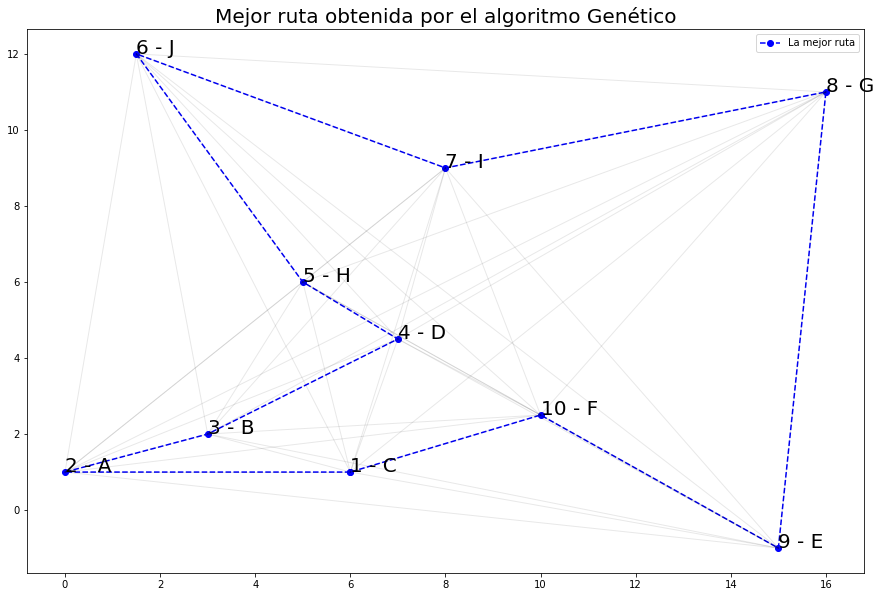

In [56]:
#Plotear la mejor ruta apartir de la solución
x_ruta_mas_corta =[]
y_ruta_mas_corta =[]
for ciudad in ruta_mas_corta:
    x_val, y_val = coordenadas_ciudades[ciudad]
    x_ruta_mas_corta.append(x_val)
    y_ruta_mas_corta.append(y_val)

x_ruta_mas_corta.append(x_ruta_mas_corta[0])
y_ruta_mas_corta.append(y_ruta_mas_corta[0])

fig, ax = plt.subplots()
ax.plot(x_ruta_mas_corta, y_ruta_mas_corta, '--bo', label ='La mejor ruta')
plt.legend()

for i in range(len(x)):
    for j in range(i + 1, len(x)):
        ax.plot([x[i], x[j]], [y[i], y[j]], 'k-', alpha=0.09, linewidth=1)

plt.title(label='Mejor ruta obtenida por el algoritmo Genético', fontsize=20, color='k')
for i, txt in enumerate(ruta_mas_corta):
    ax.annotate(str(i+1)+' - '+txt, (x_ruta_mas_corta[i], y_ruta_mas_corta[i]), fontsize=20)
fig.set_size_inches(15,10)
plt.show()